In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the exercise log data
log_file = "../exercise_log.csv"
log_df = pd.read_csv(log_file)


         Date Exercise Name  Type  Duration (mins)  Repetitions  \
0  2025-02-03      Push-Ups   Rep                0           26   
1  2025-01-21     Dead Hang  Time               44            0   
2  2025-01-20        Rowing  Time               44            0   
3  2025-02-09      Wall Sit  Time               58            0   
4  2025-01-14      Pull-Ups   Rep                0           46   

   Calories Burned  
0             13.0  
1            176.0  
2            396.0  
3            232.0  
4             46.0  


In [11]:
# Convert Date column to datetime format
log_df["Date"] = pd.to_datetime(log_df["Date"])

# Group data by Date and sum calories burned per day
daily_calories = log_df.groupby("Date")["Calories Burned"].sum()

# Group data by week (ISO week) and sum calories burned per week
weekly_calories = log_df.resample("W", on="Date")["Calories Burned"].sum()

# Count frequency of each exercise
exercise_frequency = log_df["Exercise Name"].value_counts()

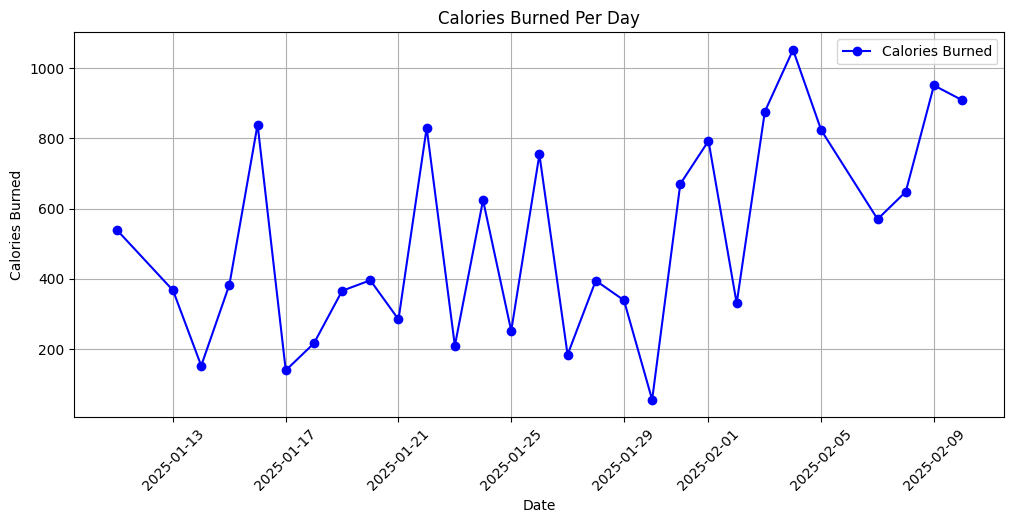

In [ ]:
#Calories Burned Per Day
plt.figure(figsize=(12, 5))
plt.plot(daily_calories.index, daily_calories.values, marker='o', linestyle='-', color='b', label="Calories Burned")
plt.xlabel("Date")
plt.ylabel("Calories Burned")
plt.title("Calories Burned Per Day")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()



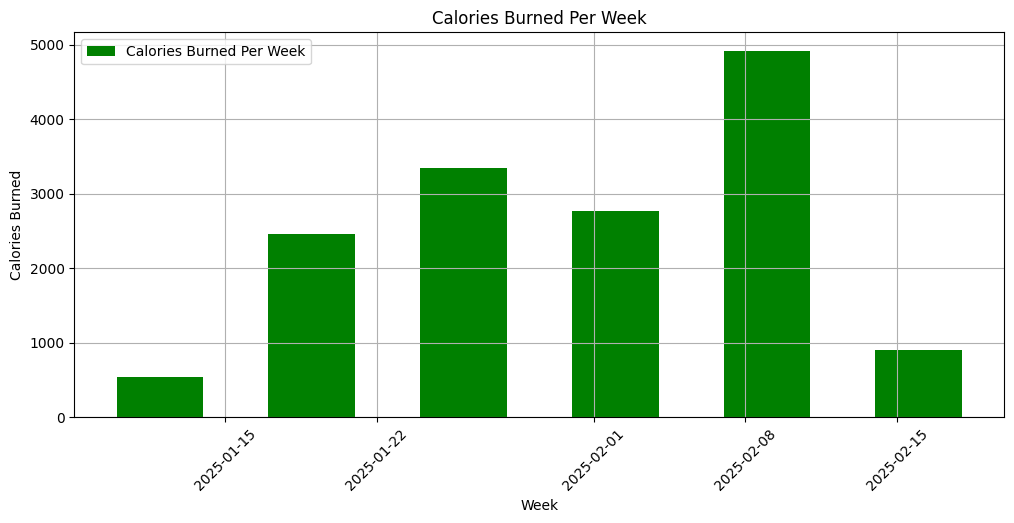

In [ ]:
# Calories Burned Per Week
plt.figure(figsize=(12, 5))
plt.bar(weekly_calories.index, weekly_calories.values, width=4, color='g', label="Calories Burned Per Week")
plt.xlabel("Week")
plt.ylabel("Calories Burned")
plt.title("Calories Burned Per Week")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

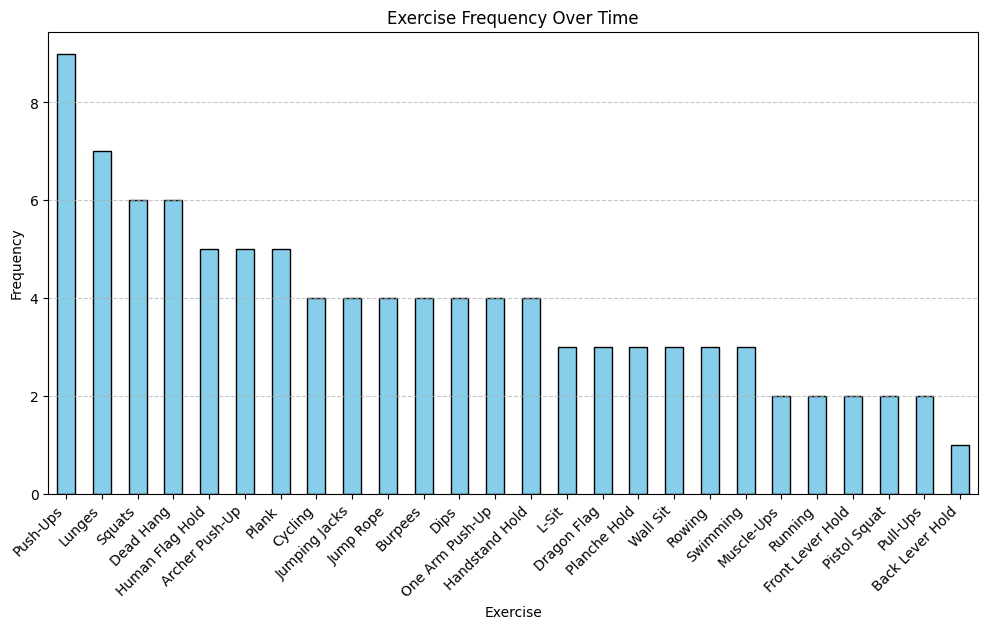

In [ ]:
#Exercise Frequency
plt.figure(figsize=(12, 6))
exercise_frequency.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Exercise")
plt.ylabel("Frequency")
plt.title("Exercise Frequency Over Time")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


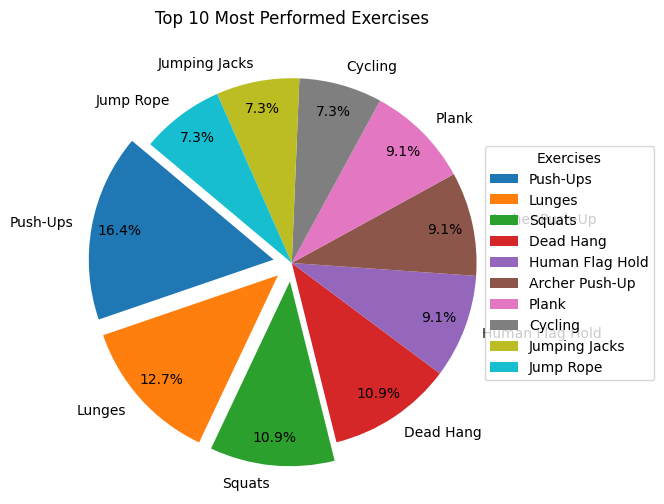

In [ ]:
# top 10 exercises
top_n = 10
top_exercises = exercise_frequency[:top_n]

# Pie Chart for Top 10 Exercises
plt.figure(figsize=(10, 6))
explode_values = [0.1 if i < 3 else 0 for i in range(len(top_exercises))]  # top 3 exercises
top_exercises.plot(kind="pie", autopct="%1.1f%%", startangle=140, cmap="tab10", 
                   explode=explode_values, pctdistance=0.85)

plt.title("Top 10 Most Performed Exercises")
plt.ylabel("")  # Hide y-axis label
plt.legend(title="Exercises", bbox_to_anchor=(1.3, 0.5), loc="center right")
plt.show()